In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook
# Dataimported from genesis and OECD statistics
#Interactive plots. The individual years can be zoomed in with the jupyter notebook interface.

# Average life span in Germany graph 

<IPython.core.display.Javascript object>


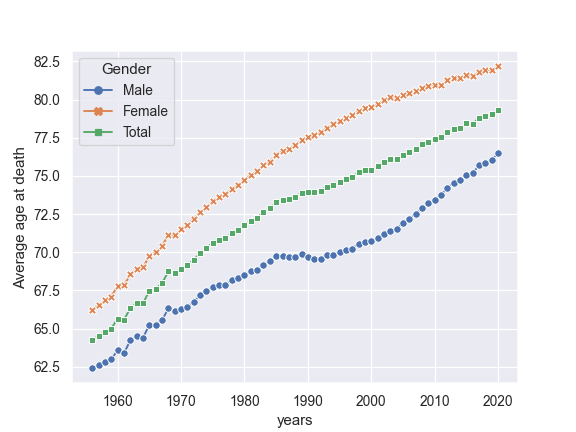

In [39]:
fig = plt.figure()
sns.set(style='darkgrid')
df=pd.read_csv('average-life.csv',delimiter=';')
df['time']=pd.to_datetime(df['time'],format='%Y')
df=df.rename(columns={"BEV033__Average_age_at_death__years":"Average age at death","2_variable_code.2":"Gender","time":"years"})
sns.lineplot(x="years",y="Average age at death",hue="Gender",data=df,style="Gender",
    markers=True, dashes=False)
plt.savefig('average-life.png')

#Average age at death for male and female in Germany from 1956 is given.

# Avoidable mortality graph:

In [40]:
df1=pd.read_csv('Mortality.csv')
df1=df1.loc[(df1['Country'] == 'Germany')& (df1['Variable']=='Avoidable mortality (preventable+treatable)')]
df1
df1=df1.loc[df1['Measure'].isin(['Number of male deaths','Number of female deaths','Number of total deaths'])]

<IPython.core.display.Javascript object>


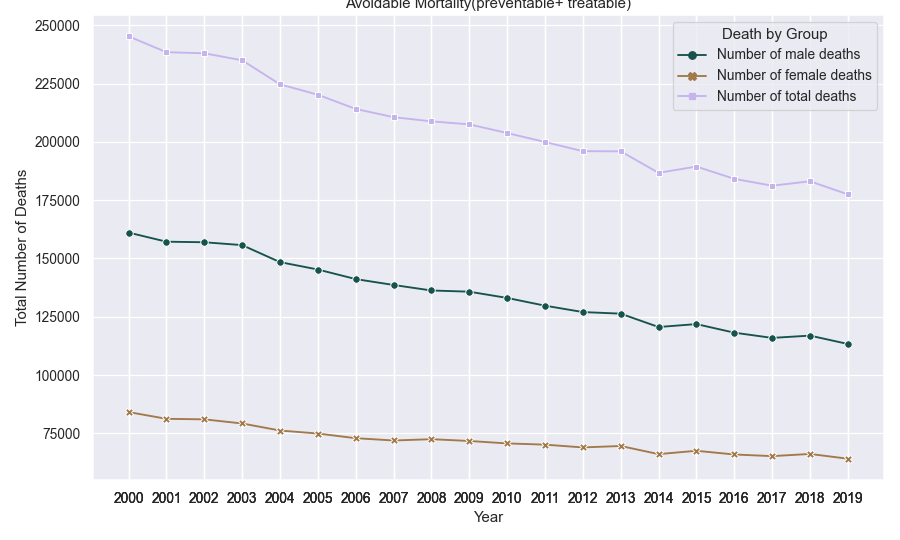

In [41]:
figure = plt.figure(figsize=(10, 6))
sns.lineplot(x="Year",y="Value",hue="Measure",data=df1,style="Measure",
    markers=True, dashes=False,palette="cubehelix")
plt.xticks(df1['Year'])
plt.tight_layout()
plt.legend(title='Death by Group')
plt.ylabel('Total Number of Deaths')
plt.title('Avoidable Mortality(preventable+ treatable)')
plt.savefig('avoidable-mortality.png')

#The graph shows both the preventable and avoidable mortality statistics of Germany from 2000 to 2019


# Preventable vs Treatable Mortality graph

<IPython.core.display.Javascript object>


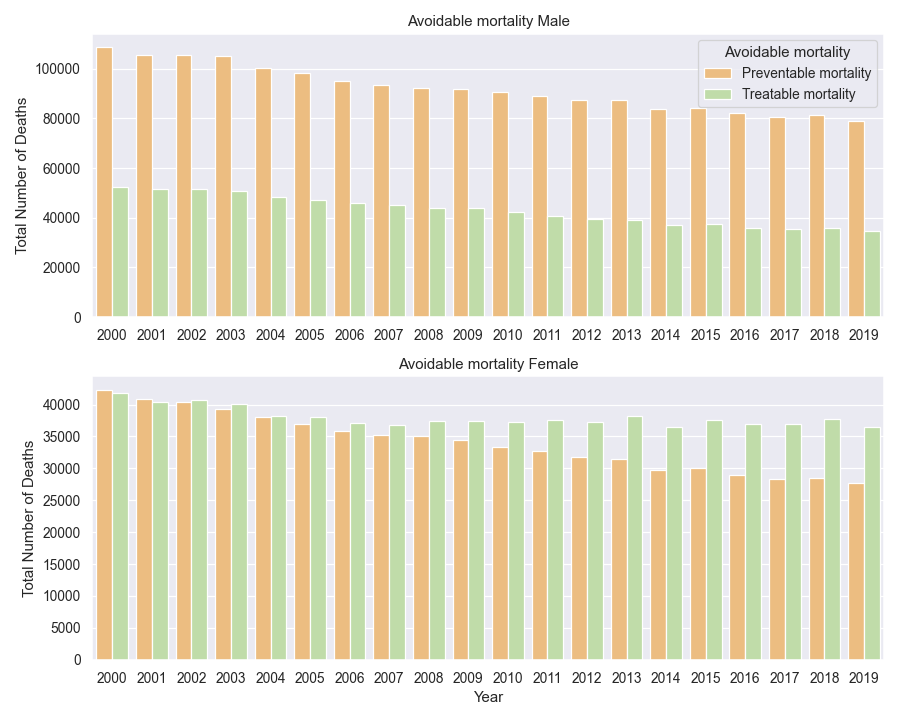

In [42]:
df=pd.read_csv('Mortality.csv')
df1=df.loc[(df['Country'] == 'Germany')&(df['Variable'].isin(['Treatable mortality','Preventable mortality']))&(df['Measure']=='Number of male deaths')]
df2=df.loc[(df['Country'] == 'Germany')&(df['Variable'].isin(['Treatable mortality','Preventable mortality']))&(df['Measure']=='Number of female deaths')]
fig, axes = plt.subplots(2, 1,figsize=(10, 8))
ax0=sns.barplot(x="Year",y="Value",hue="Variable",data=df1,ci=None,palette="Spectral",ax=axes[0])
ax1=sns.barplot(x="Year",y="Value",hue="Variable",data=df2,palette="Spectral",ci=None,ax=axes[1])
ax0.set_title('Avoidable mortality Male')
ax1.set_title('Avoidable mortality Female')
ax0.set(xlabel=None)
ax0.set(ylabel='Total Number of Deaths')
ax0.get_legend().set_title("Avoidable mortality")
ax1.get_legend().remove()
ax1.set(ylabel='Total Number of Deaths')
plt.tight_layout()
plt.savefig('mortality.png')

#A bar graph to show the preventable and treatable mortality separately for the two groups

# Countrywise Avoidable mortality graph

<IPython.core.display.Javascript object>


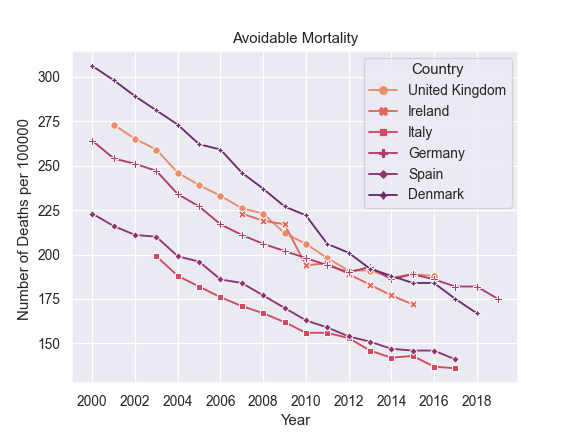

In [43]:
df1=pd.read_csv('Mortality.csv')
df1=df1.loc[(df1['Country'].isin(['Germany','Spain','United Kingdom','Italy','Denmark','Ireland'])) & (df1['Variable']=='Avoidable mortality (preventable+treatable)')]
df1=df1.loc[df1['Measure']=="Deaths per 100 000 population (standardised rates)"]
plt.figure()
df1['Year']=pd.to_datetime(df1['Year'],format='%Y')
sns.lineplot(x="Year",y="Value",hue="Country",data=df1,style="Country",
    markers=True, dashes=False,palette="flare")
plt.ylabel('Number of Deaths per 100000 ')
plt.title('Avoidable Mortality')
plt.savefig('Countrymortality.png')

<IPython.core.display.Javascript object>


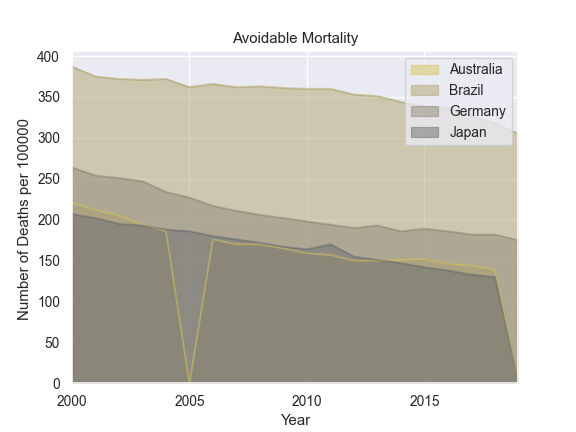

In [46]:
df1=pd.read_csv('Mortality.csv')
df1=df1.loc[(df1['Country'].isin(['Germany','Australia','Brazil','Japan'])) & (df1['Variable']=='Avoidable mortality (preventable+treatable)')]
df1=df1.loc[df1['Measure']=="Deaths per 100 000 population (standardised rates)"]
df1['Year']=pd.to_datetime(df1['Year'],format='%Y')
df1=pd.pivot_table(df1,index='Year',columns='Country',values='Value')
df1.plot.area(stacked=False,color=sns.color_palette("cividis_r"))
plt.ylabel('Number of Deaths per 100000 ')
plt.title('Avoidable Mortality')
plt.savefig('areachart.png')
plt.legend(loc="upper right")

<IPython.core.display.Javascript object>


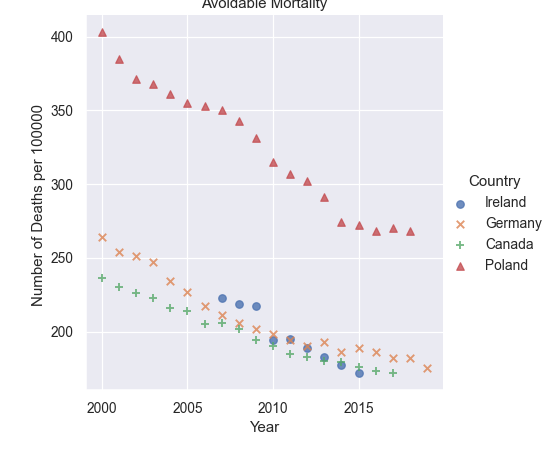

In [80]:
df1=pd.read_csv('Mortality.csv')
df1=df1.loc[(df1['Country'].isin(['Germany','Canada','Ireland','Poland'])) & (df1['Variable']=='Avoidable mortality (preventable+treatable)')]
df1=df1.loc[df1['Measure']=="Deaths per 100 000 population (standardised rates)"]
sns.lmplot(x="Year",y="Value",hue="Country",data=df1,fit_reg=False,markers=["o","x","+","^"])
plt.ylabel('Number of Deaths per 100000 ')
plt.title('Avoidable Mortality')
plt.savefig('scatterplot.png')

<IPython.core.display.Javascript object>


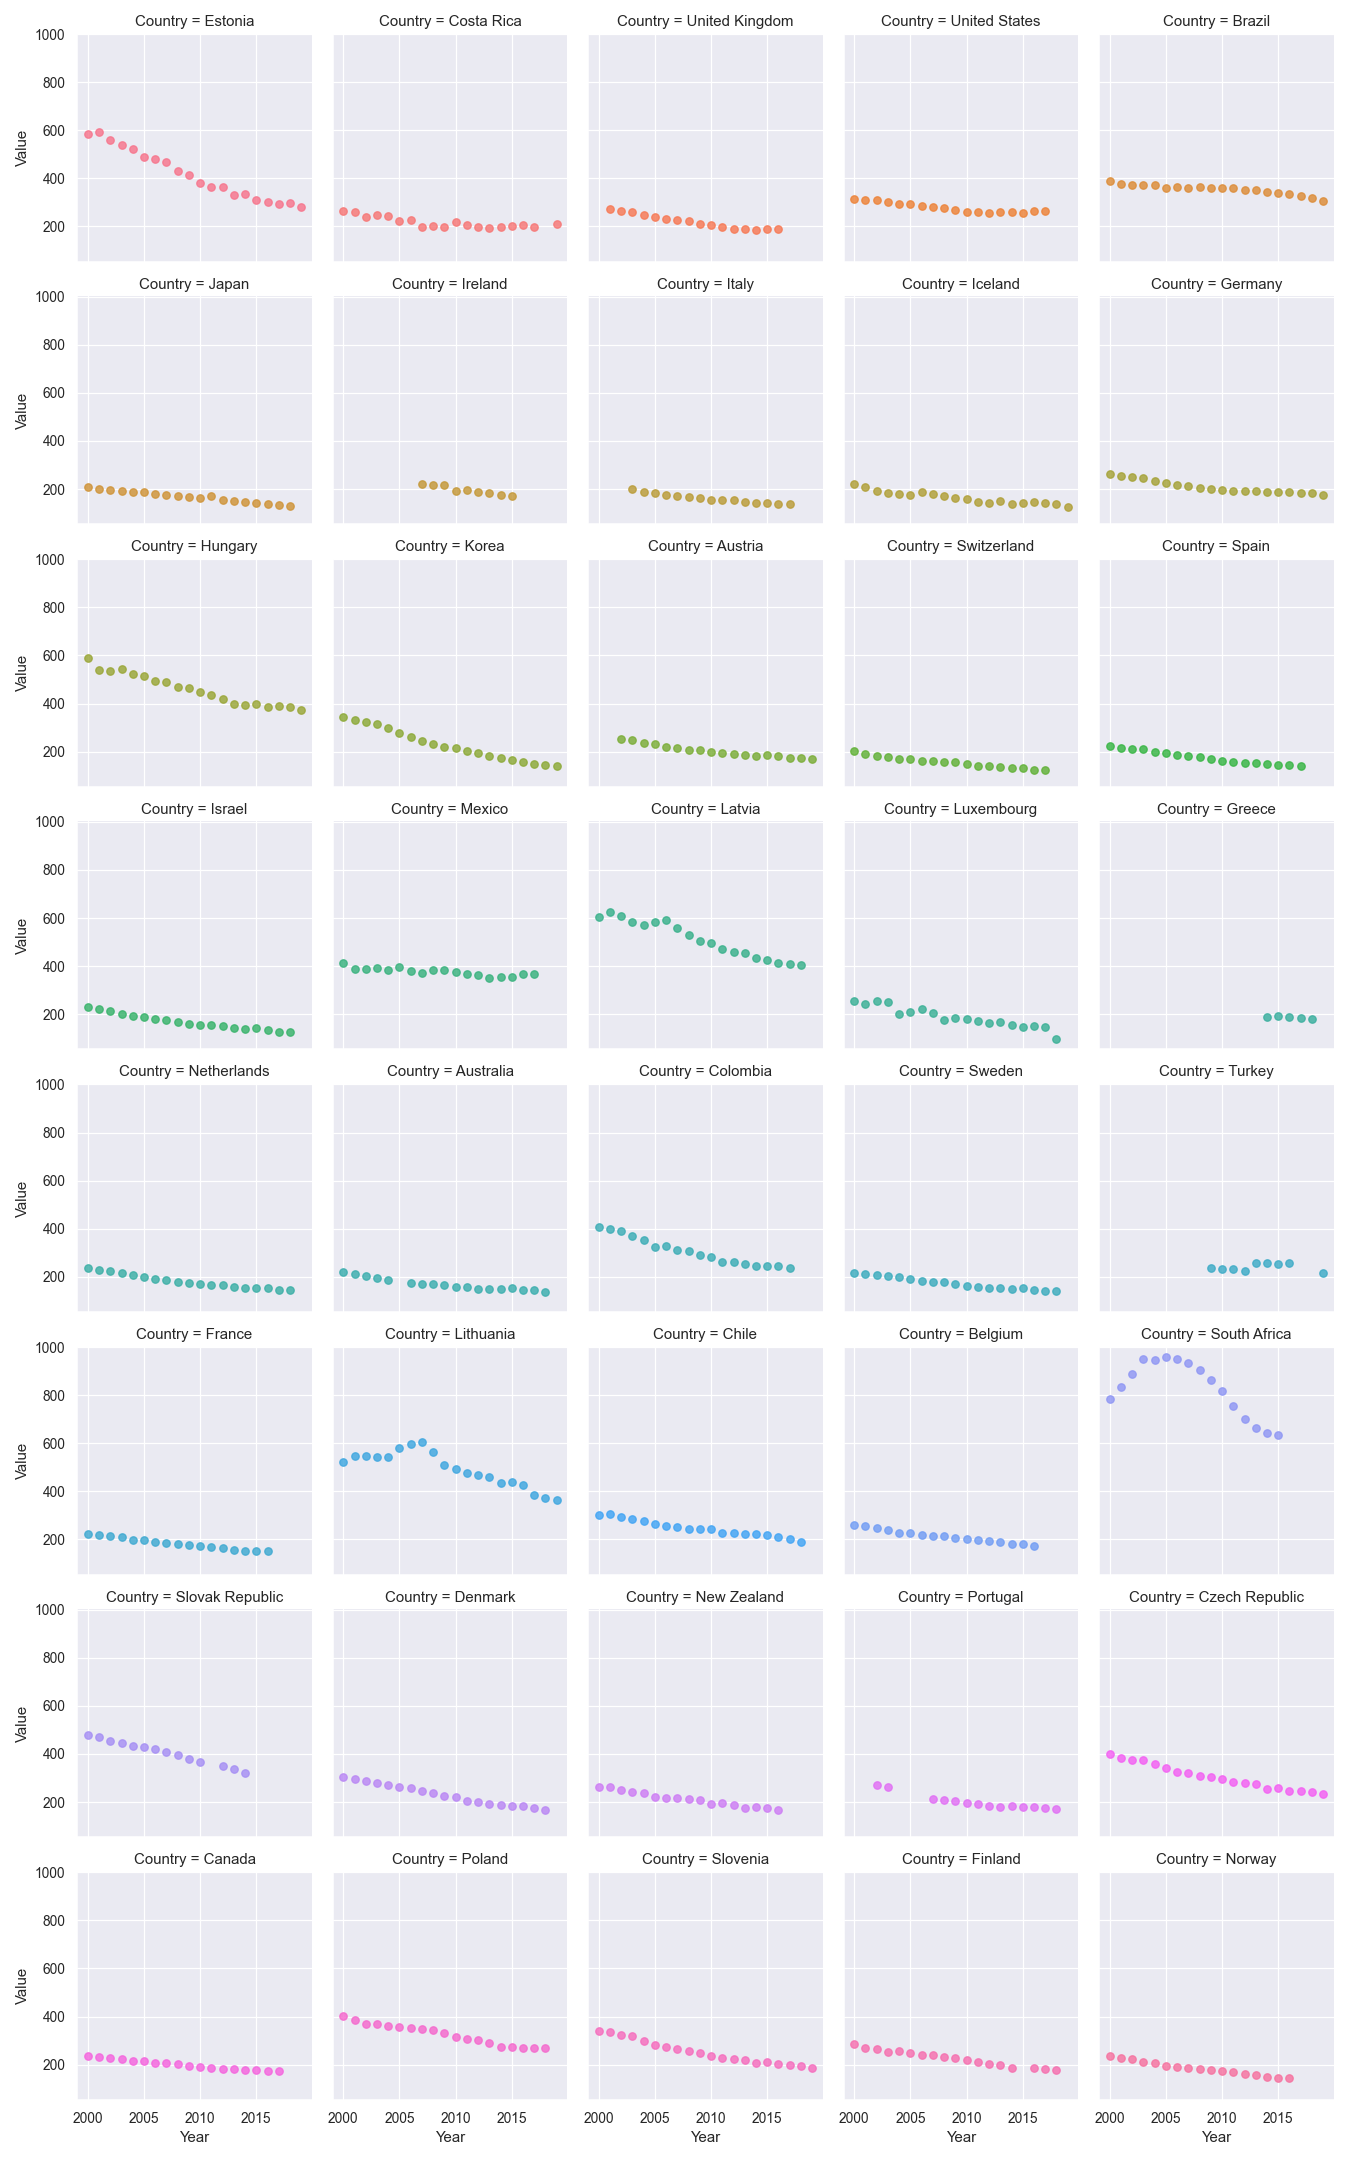

In [79]:
df1=pd.read_csv('Mortality.csv')
df1=df1.loc[(df1['Variable']=='Avoidable mortality (preventable+treatable)')]
df1=df1.loc[df1['Measure']=="Deaths per 100 000 population (standardised rates)"]
sns.lmplot(x='Year',y="Value",hue="Country",col="Country",data=df1,fit_reg=False,col_wrap=5,height=3)
plt.savefig('scattergrid.png')